In [2]:
import numpy as np
import pandas as pd
import math
import time
import re
import os
from skimage import util
from scipy.io import wavfile
from scipy import signal
from scipy import stats
import xarray as xr

#visualizing results
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
netcdf_path = 'C:/Users/Schindler/Documents/ProgrammingFun/USV_python/Datasets'

In [5]:
path_names = []
files = os.listdir(netcdf_path)
for file in files: 
        path_names.append(netcdf_path + "/" + file)

path_names

['C:/Users/Schindler/Documents/ProgrammingFun/USV_python/Datasets/533_xr_Dataset.nc',
 'C:/Users/Schindler/Documents/ProgrammingFun/USV_python/Datasets/534_xr_Dataset.nc',
 'C:/Users/Schindler/Documents/ProgrammingFun/USV_python/Datasets/535_xr_Dataset.nc',
 'C:/Users/Schindler/Documents/ProgrammingFun/USV_python/Datasets/542_xr_Dataset.nc',
 'C:/Users/Schindler/Documents/ProgrammingFun/USV_python/Datasets/543_xr_Dataset.nc',
 'C:/Users/Schindler/Documents/ProgrammingFun/USV_python/Datasets/554_xr_Dataset.nc',
 'C:/Users/Schindler/Documents/ProgrammingFun/USV_python/Datasets/555_xr_Dataset.nc',
 'C:/Users/Schindler/Documents/ProgrammingFun/USV_python/Datasets/559_xr_Dataset.nc',
 'C:/Users/Schindler/Documents/ProgrammingFun/USV_python/Datasets/600_xr_Dataset.nc']

In [6]:
data = xr.open_dataset(path_names[2])

In [69]:
data['slices'].values[3]

67.5

In [98]:
max_value = np.log(data.sel(slices=slice(67.5, 5.999625e+05)).max(xr.ALL_DIMS)['__xarray_dataarray_variable__'].values)
min_value = np.log(data.sel(slices=slice(67.5, 5.999625e+05)).min(xr.ALL_DIMS)['__xarray_dataarray_variable__'].values)
max_value

12.80856

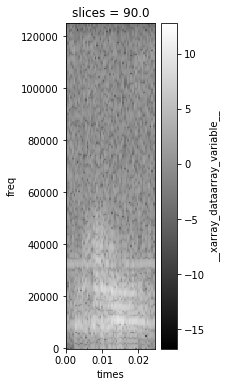

In [115]:
plt.figure(figsize=(2,6))
xr.ufuncs.log(data['__xarray_dataarray_variable__'][4,:,:]).plot(cmap='gray', vmin=min_value*.5, vmax=max_value)
plt.show()
#ax.set_aspect("equal")

Create data frame of annotation info

In [5]:
features_path = 'C:/Users/Schindler/Documents/ProgrammingFun/USV_python/annot_features_full.csv'
annot_features_data = pd.read_csv(features_path)
annot_features_full = pd.DataFrame(data = annot_features_data)
print(annot_features_full.shape)
annot_features_full.head()

(1084, 7)


,Unnamed: 0,Animal,Group,Annotation,time_stamp,power_sum,spec_pur
0,0,533,5,low slug,46305.0,32714.904,0.368722
1,1,533,5,low slug,149692.5,43037.465,0.306856
2,2,533,5,low slug,243157.5,270193.530,0.062226
3,3,533,5,low slug,243270.0,63014.450,0.232295
4,4,533,5,low multi,295560.0,74933.164,0.206291


In [ ]:
plt.figure(figsize=(10,10))
plt.hist(yes_spec_purs, color='green', bins = 500)
plt.hist(no_spec_purs, color='red', alpha = .5, bins = 500)
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
plt.hist(yes_sums, color='green', bins = 500)
plt.hist(no_sums, color='red', alpha = .5, bins = 500)
plt.show()

In [ ]:
data_no['slices'].values[0]

In [ ]:
spec_slice = data_yes.sel(slices = data_yes['slices'].values[0])['__xarray_dataarray_variable__'].values
spec_slice.mean()

In [ ]:
data_yes['slices']

In [ ]:
spec_slice = data.sel(slices = 45.0)['__xarray_dataarray_variable__'].values
spec_slice.sum()

In [ ]:
x = data['__xarray_dataarray_variable__']
x[0]

In [ ]:
data.sel()

In [ ]:
spec_slice.mean(dim='times')
x

In [ ]:
spec_slice = data.sel(slices = 90.0)
spec_slice

In [ ]:
data.to_pandas()

In [ ]:
data.sel(freq=slice(0,20000))[4,:,:].plot()